# Using SG filter to determine derivatives
## Purpose of this notebook
Sanity check if SciPy SG filter is used correctly to determine derivatives. This is one of the main uses of using SG filters.

## Import Python modules

In [1]:
import pandas as pd # data frames

import numpy as nm # numerical python

import plotly.express as px # plotly plotting

from scipy.signal import savgol_filter # SG filter from scientific python

# Create some fake vessel motion data
The basic form of a sinusoid as a function of time $(t)$ is:
$
y(t) = A\sin(2 \pi f t + \varphi) = A\sin(\omega t + \varphi)
$

In [81]:
# time vector in seconds
t = nm.linspace(0, 36, 240) # 36 seconds, 240 steps

In [82]:
A = 4 # amplitude
p = 12 # period
f = 1/p # normal freq

In [83]:
# pitch angle
pitch = A * nm.sin(2 * nm.pi * f * t) #+ 0.5 * A * nm.sin(4 * nm.pi * f * t)

In [84]:
# pitch angle speed
pitch_speed = savgol_filter(pitch, 6, 3, deriv=1, delta=t[1]-t[0])

In [85]:
# pitch angle acceleration
pitch_accel = savgol_filter(pitch, 6, 3, deriv=2, delta=t[1]-t[0])

In [86]:
# create a dataframe
vm = pd.DataFrame({
    'Time': t,
    'Pitch Angle': pitch,
    'Pitch Speed': pitch_speed,
    'Pitch Accel': pitch_accel
    })

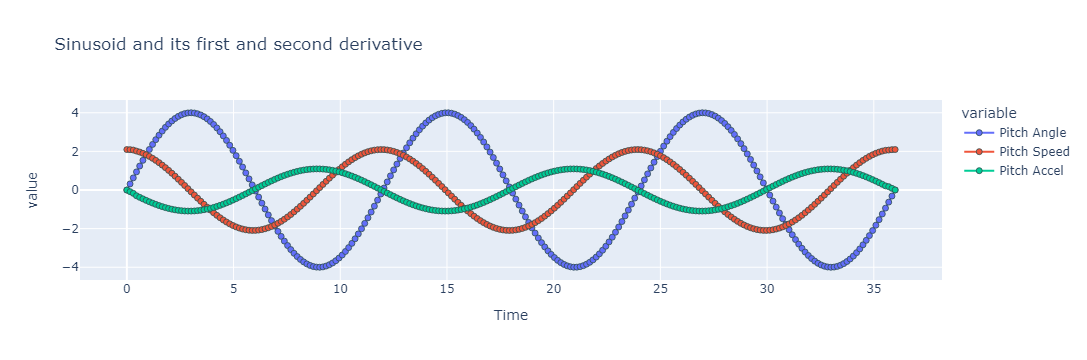

In [87]:
#plot the data frame
fig = px.scatter(vm,
              x='Time',
              y=vm.columns[[1, 2, 3]],
              title='Sinusoid and its first and second derivative')

fig.update_layout(hovermode='x unified')

fig.update_traces(marker=dict(size=6,
                              line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_traces(mode='markers+lines')

fig.show()

We expect to see that the 1st derivative (Pitch Speed) is zero when the Pitch Angle is at a maximum or minimum (i.e., when gradient of the graph/trace is zero).
Likewise, the 2nd derivative (Pitch Accel) should be zero when the Pitch Speed gradient is zero.